In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import ReexploreLevel
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE

import numpy as np
from copy import deepcopy
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)

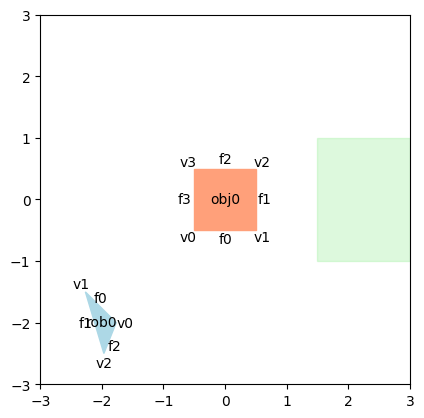

In [15]:
ws = 3
target_regions = [
    ContactRegionParams(region_vertices=[[1.5,-1], [1.5,1], [3,1], [3,-1]],
                  obj_indicies=[0]),
]

params = ContactGraphGeneratorParams(
    name="cg_simple_3",
    obs_vertices=[],
    obj_vertices=[np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])],
    rob_vertices=[np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])],
    source_obj_pos=[[0, 0]],
    source_rob_pos=[[-2, -2]],
    target_region_params=target_regions,
    n_pos_per_set=2,
    workspace=[[-ws, ws], [-ws, ws]],
)
generator = ContactGraphGenerator(params)
generator.plot()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04


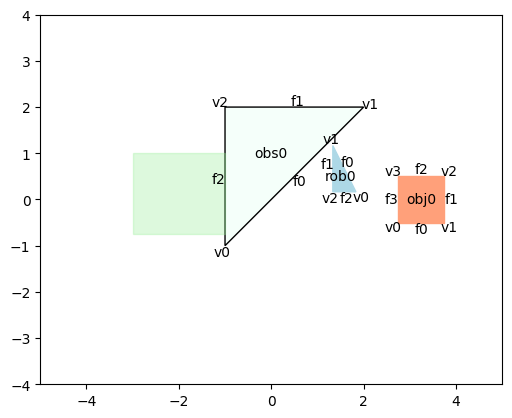

In [2]:
ws_x = 5
ws_y = 4
target_region_params = [
    ContactRegionParams(region_vertices=[[-3,-0.75], [-3,1], [-1,-0.75], [-1,1]],
                  obj_indicies=[0]),
]
params = ContactGraphGeneratorParams(
    name="cg_trichal4",
    obs_vertices=[[[-1, 2], [-1, -1], [2, 2]]],
    obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
    rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
    source_obj_pos=[[3.25, 0]],
    source_rob_pos=[[1.5, 0.5]],
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [ ]:
generator.generate()

In [16]:
# cg = ContactGraph.load_from_file(params.graph_file_path)
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_simple_3"))

INFO:large_gcs.graph.contact_graph:Loading 11 contact pair modes for 2 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 11 sets...


100%|██████████| 11/11 [00:00<00:00, 40.00it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 13/13 [00:00<00:00, 9601.33it/s]
INFO:large_gcs.graph.graph:Adding 13 vertices to graph...
100%|██████████| 13/13 [00:00<00:00, 12286.15it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 72/72 [00:00<00:00, 9333.64it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 72/72 [00:00<00:00, 4799.66it/s]
INFO:large_gcs.graph.graph:Adding 72 edges to graph...
100%|██████████| 72/72 [00:00<00:00, 4055.46it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 16), n_vertices=13, n_edges=72, source=[array([0, 0]), array([-2, -2])], target='regions', workspace=array([[-3,  3],
       [-3,  3]]), default_costs_constraints=None)


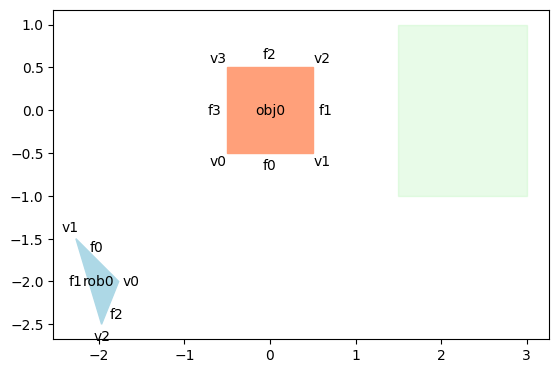

In [17]:
cg.plot()

In [18]:
cg.incoming_edges("target")

[Edge(u="('IC|obj0_f0-rob0_v1',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x18466d370>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x184a15a70>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x184aced70>),
 Edge(u="('IC|obj0_f1-rob0_v1',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x18465f2b0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x184a089b0>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x184a5b6b0>),
 Edge(u="('IC|obj0_f2-rob0_v2',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x184a2cf30>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x184a1daf0>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x184a2cbb0>),
 Edge(u="('IC|obj0_f3-rob0_v0',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x184a2fd30>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x1

In [20]:
cg.outgoing_edges("source")

[Edge(u='source', v="('NC|obj0_f0-rob0_v1',)", costs=[<pydrake.solvers.LinearCost object at 0x184a288f0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x184a80730>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x184acd030>),
 Edge(u='source', v="('NC|obj0_f3-rob0_v0',)", costs=[<pydrake.solvers.LinearCost object at 0x184a2a4b0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x184a82e70>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x184aa01b0>)]

In [6]:
# sol = cg.solve_shortest_path(use_convex_relaxation=False)
# print(sol)

In [19]:
cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
gcs_astar = GcsAstar(
    cg,
    cost_estimator=cost_estimator,
    # reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.algorithms.gcs_astar:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.154, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 2 neighbors (0)
DEBUG:large_gcs.algorithms.gcs_astar:edge source -> ('NC|obj0_f0-rob0_v1',) not actually feasible
DEBUG:large_gcs.algorithms.gcs_astar:edge source -> ('NC|obj0_f3-rob0_v0',) not actually feasible


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp5nxrq_om/temp.m4v


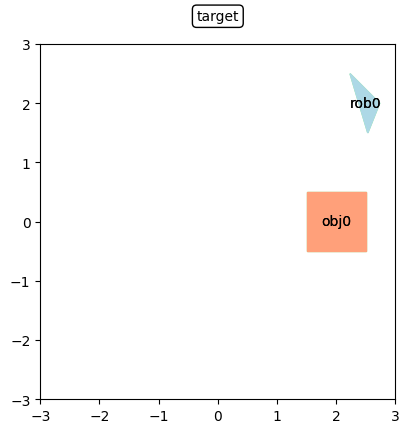

In [14]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())